<a href="https://colab.research.google.com/github/PranayPrasanth/100DaysOfCode-DataScience-Projects/blob/master/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
cols = ['Date', 'Programming Language', 'Number of Posts']
df = pd.read_csv('QueryResults.csv', names=cols)[1:]


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head(5)
df.isna().values.any()
df.duplicated().values.any()


np.False_

**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
count = [df[column].count() for column in df.columns]
print(count)

[np.int64(1991), np.int64(1991), np.int64(1991)]


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df_posts_by_language = df.groupby('Programming Language').sum()
df_posts_by_language.sort_values('Number of Posts', ascending=False)


,Date,Number of Posts
Programming Language,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510.0
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403.0
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1496210.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1361988.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,356799.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,273055.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:

print(type(df['Date'][1]))

df.groupby("Programming Language").count()

<class 'str'>


,Date,Number of Posts
Programming Language,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144



## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df['Date'] = pd.to_datetime(df.Date)


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='Date', columns='Programming Language', values='Number of Posts')
reshaped_df

Programming Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [10]:
reshaped_df.shape

(145, 14)

In [11]:
reshaped_df.fillna(0,inplace=True)

In [12]:
reshaped_df

Programming Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

<ipython-input-13-b9143a271e55>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


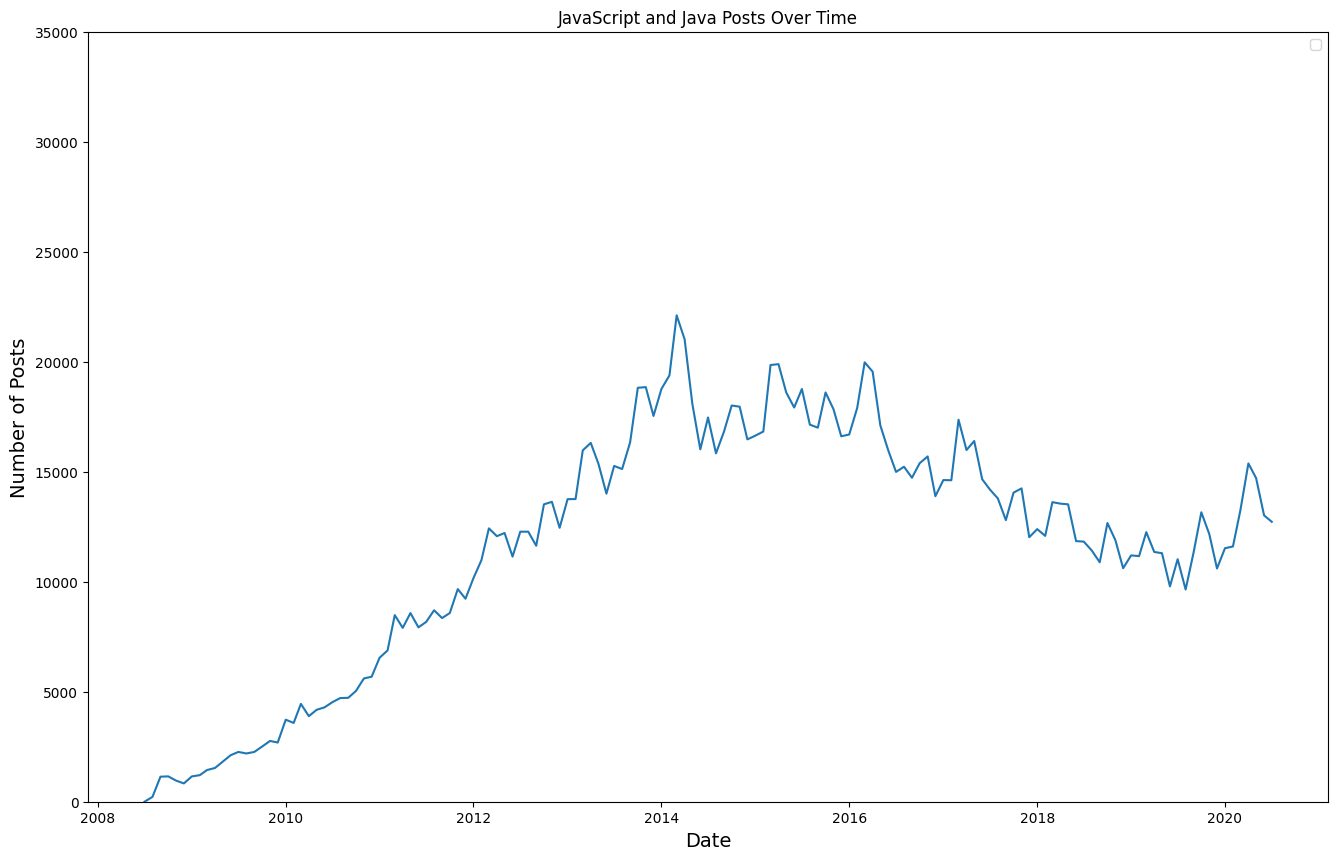

In [13]:
plt.figure(figsize=(16,10))
plt.legend()

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.title('JavaScript and Java Posts Over Time')

plt.plot(reshaped_df.index, reshaped_df.java)





Challenge: Use the matplotlib documentation to plot two programming language (e.g., java and python) on a single chart.

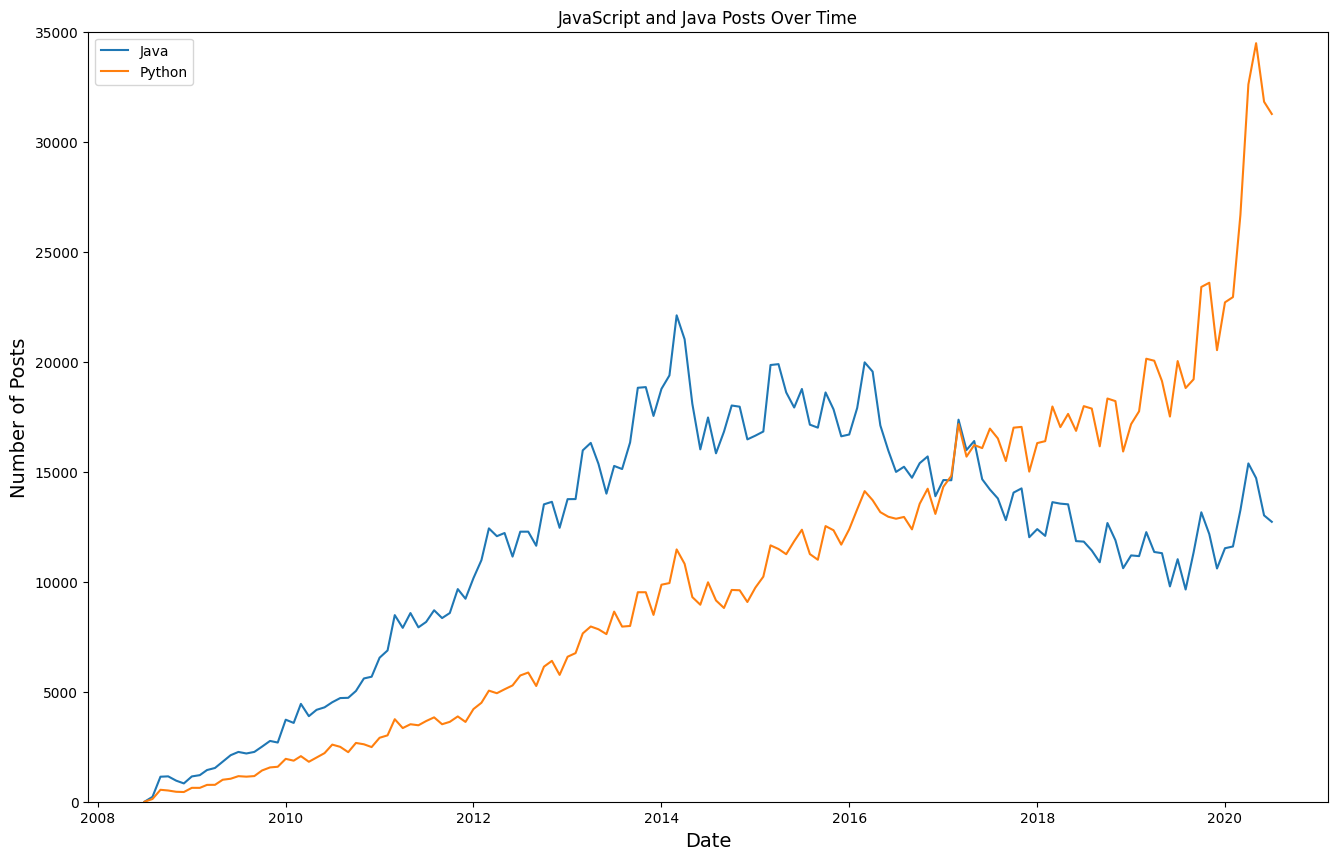

In [22]:
plt.figure(figsize=(16,10))


plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.title('JavaScript and Java Posts Over Time')

plt.plot(reshaped_df.index, reshaped_df.java, label='Java')
plt.plot(reshaped_df.index, reshaped_df.python, label='Python')
plt.legend()


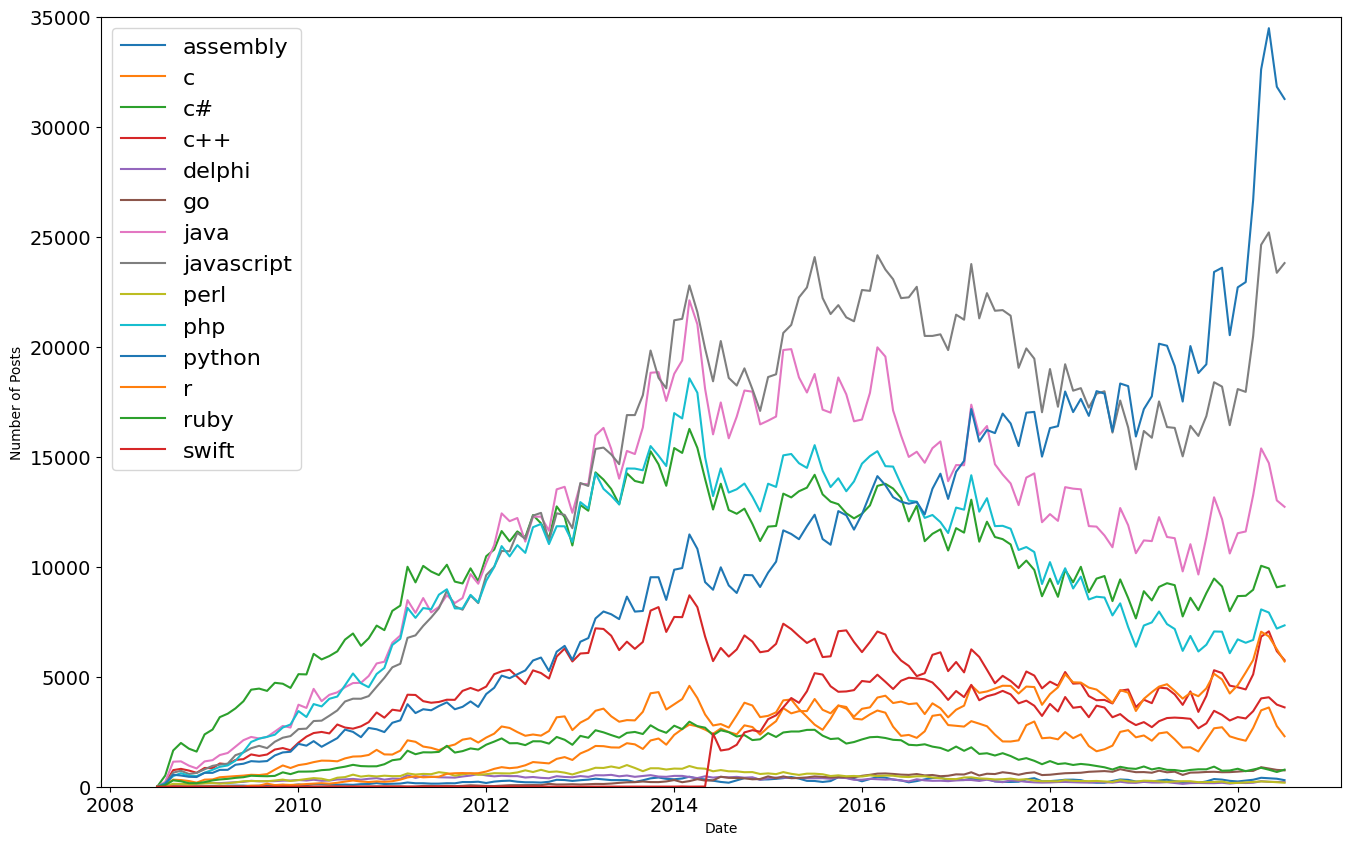

In [23]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0,35000)


for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], label=column)
plt.legend(fontsize=16)


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

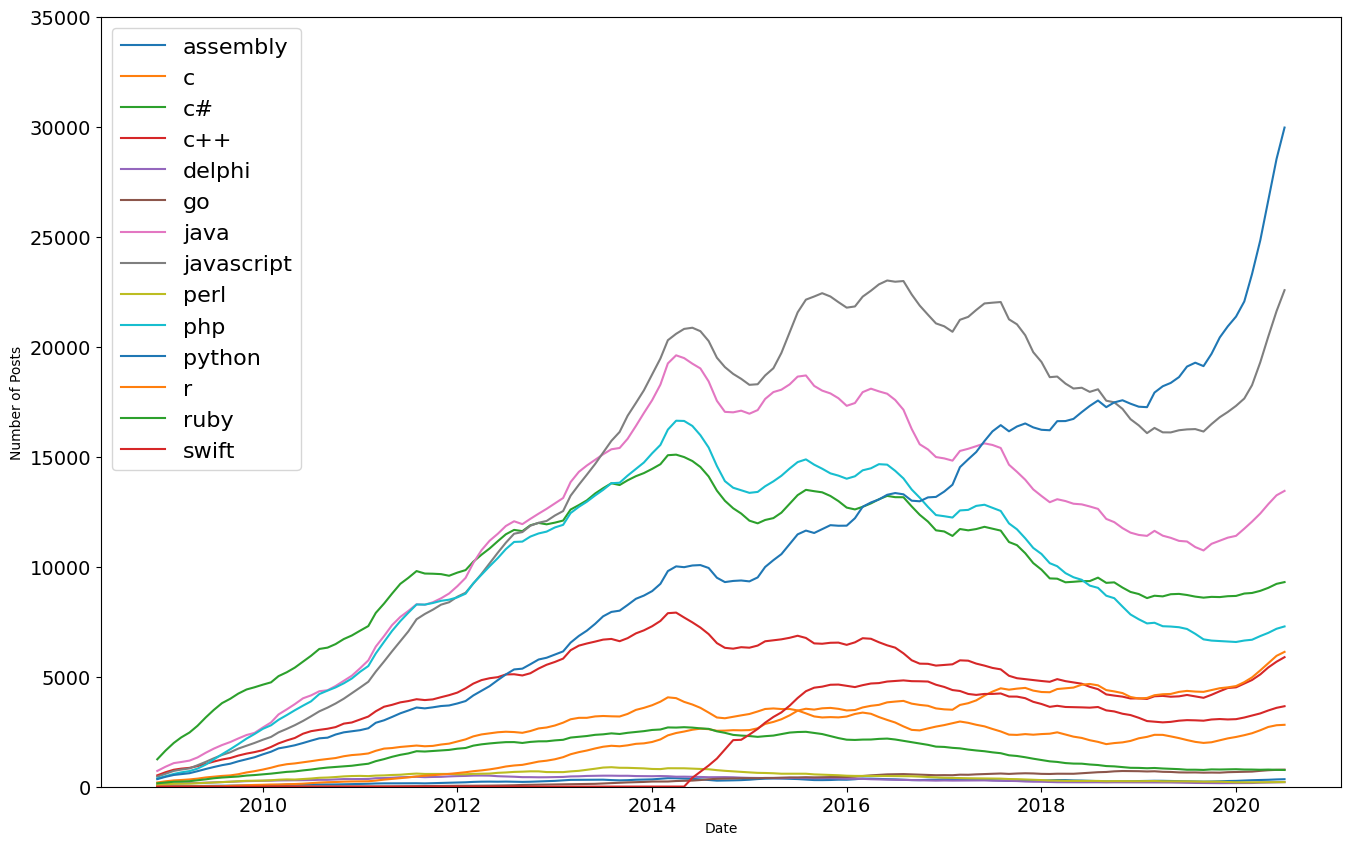

In [24]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0,35000)


for column in reshaped_df.columns:
  plt.plot(roll_df.index, roll_df[column], label=column)
plt.legend(fontsize=16)

